In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
df = pd.read_csv('D:/data/Fuel_Consumption/FuelConsumption.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


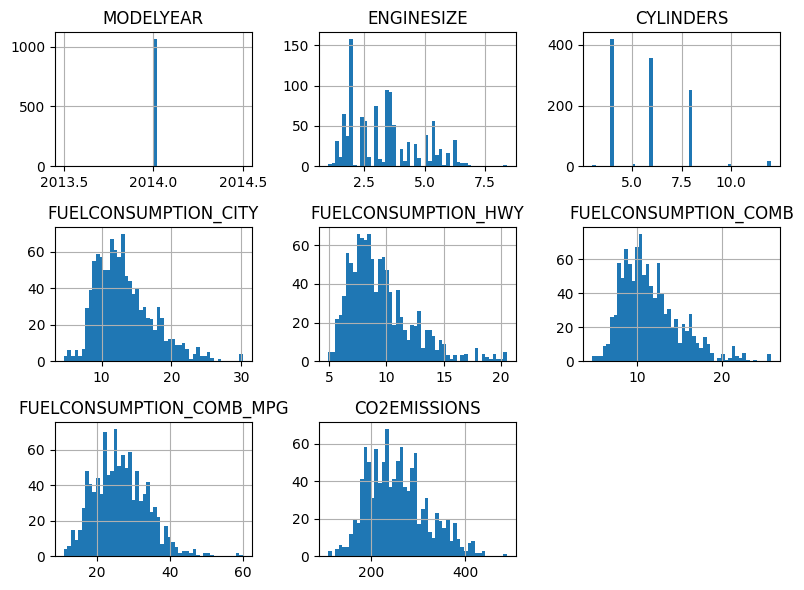

In [4]:
df.hist(figsize=(8,6),bins=50)
plt.tight_layout()

C:\Users\hp\AppData\Local\Temp\ipykernel_10648\882407208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CO2EMISSIONS)


<Axes: xlabel='CO2EMISSIONS', ylabel='Density'>

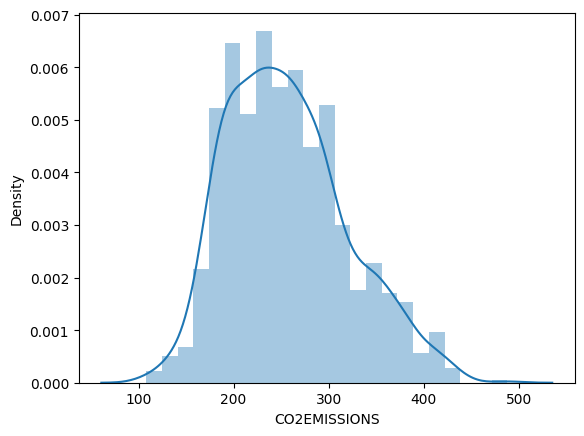

In [5]:
sns.distplot(df.CO2EMISSIONS)

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df = df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION'],axis=1)

In [8]:
LE = preprocessing.LabelEncoder()
df.FUELTYPE = LE.fit_transform(df.FUELTYPE)

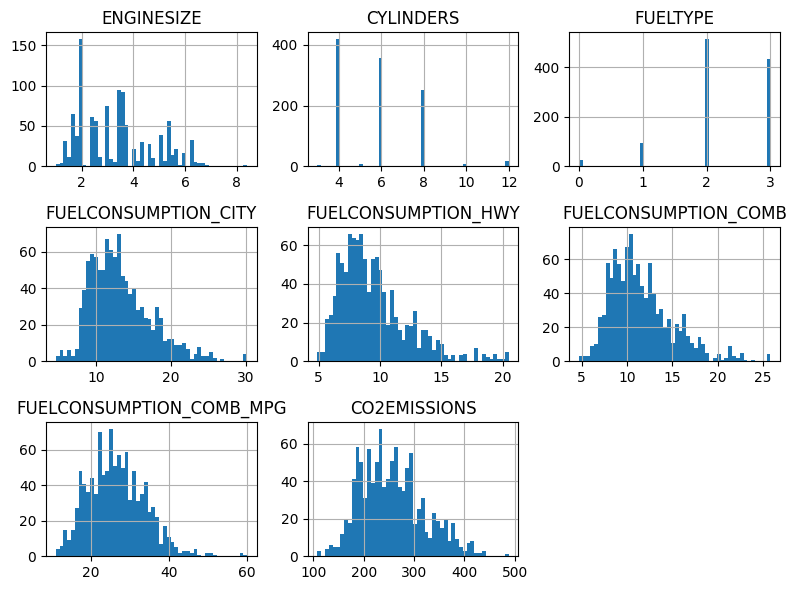

In [9]:
df.hist(figsize=(8,6),bins=50)
plt.tight_layout()

In [10]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,2.269916,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,0.722374,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,2.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,2.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,3.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
df

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,3,9.9,6.7,8.5,33,196
1,2.4,4,3,11.2,7.7,9.6,29,221
2,1.5,4,3,6.0,5.8,5.9,48,136
3,3.5,6,3,12.7,9.1,11.1,25,255
4,3.5,6,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,3.0,6,2,13.4,9.8,11.8,24,271
1063,3.2,6,2,13.2,9.5,11.5,25,264
1064,3.0,6,2,13.4,9.8,11.8,24,271
1065,3.2,6,2,12.9,9.3,11.3,25,260


In [12]:
df['MPG2'] = df.FUELCONSUMPTION_COMB_MPG / df.FUELCONSUMPTION_COMB

In [13]:
df['CONSUMPTION_AVG'] = (df.FUELCONSUMPTION_COMB + df.FUELCONSUMPTION_HWY + df.FUELCONSUMPTION_CITY) / 3

In [14]:
df['CO2_per_MPG'] = df.CO2EMISSIONS / df.FUELCONSUMPTION_COMB_MPG

<Axes: >

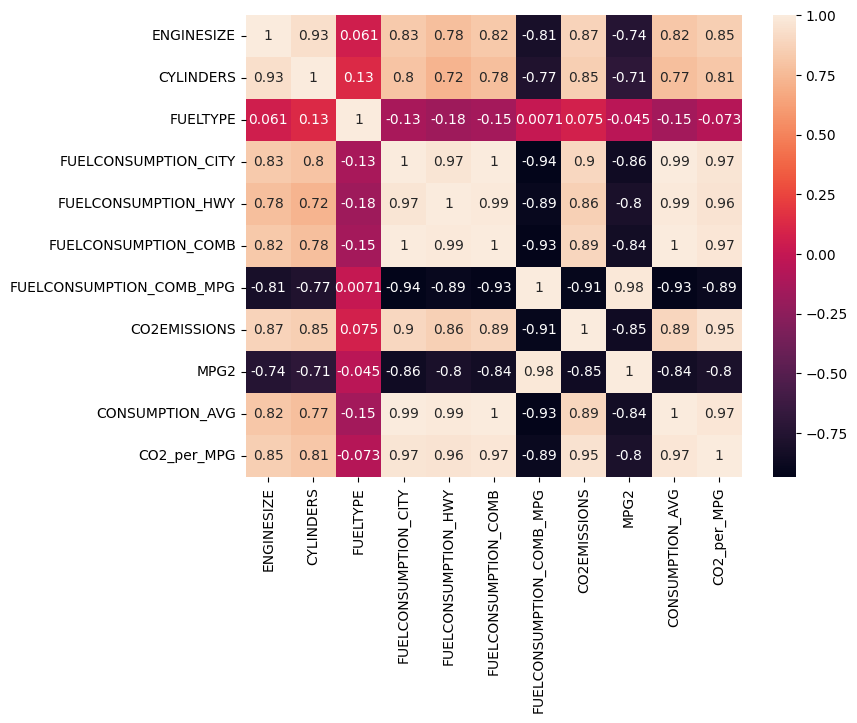

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [50]:
X = df.drop(['CO2EMISSIONS','FUELTYPE'],axis=1)
y = df.CO2EMISSIONS

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

std = preprocessing.StandardScaler()
Xtrain_scaled = std.fit_transform(Xtrain)
Xtest_scaled = std.transform(Xtest)

pca = PCA(n_components=6)
Xtrain_scaled = pca.fit_transform(Xtrain_scaled)
Xtest_scaled = pca.transform(Xtest_scaled)

model = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=1,min_samples_split=3,criterion='squared_error')
model.fit(Xtrain_scaled,ytrain)

pred = model.predict(Xtest_scaled)
print(metrics.r2_score(ytest,pred))
print(metrics.mean_squared_error(ytest,pred),end='\n\n')

print(model.score(Xtrain_scaled,ytrain))
print(model.score(Xtest_scaled,ytest))

0.9840398307275581
65.99443007119835

0.9998196196414488
0.9840398307275581


In [45]:
for i in range(2, 10):
    std = preprocessing.StandardScaler()
    Xtrain_scaled = std.fit_transform(Xtrain)  # Fitting on training data
    Xtest_scaled = std.transform(Xtest)         # Transforming test data

    pca = PCA(n_components=i, random_state=42)
    Xtrain_scaled = pca.fit_transform(Xtrain_scaled)  # Fitting PCA on training data
    Xtest_scaled = pca.transform(Xtest_scaled)        # Transforming test data

    model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=1, min_samples_split=3, criterion='squared_error')
    model.fit(Xtrain_scaled, ytrain)

    pred = model.predict(Xtest_scaled)
    print(f'{i}: {metrics.mean_squared_error(ytest, pred)}')


2: 170.42684333503388
3: 79.35297330021402
4: 81.1368596460296
5: 70.05928902161315
6: 65.99443007119835
7: 84.3827570282223
8: 75.0355796011767
9: 81.09048614323278


In [212]:
cvs = cross_val_score(model,Xtrain_scaled,ytrain,cv=10)
print(cvs)
print(np.mean(cvs))

[0.99779378 0.99134902 0.998012   0.99216234 0.94930512 0.99898682
 0.99979861 0.99973029 0.9962416  0.99946818]
0.9922847745002468


In [196]:
# مدل درخت تصمیم‌گیری رگرسیون
model = DecisionTreeRegressor(random_state=42)

# تعریف پارامترهای مورد نظر برای جستجو
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [3, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# تنظیم GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# اجرای GridSearchCV
grid_search.fit(Xtrain_scaled, ytrain)

# بهترین پارامترها و نتایج
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)


Best Parameters: {'criterion': 'poisson', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7}
Best Score (MSE): 14.835184816343688


In [214]:
import joblib
joblib.dump(model,'D:/data/Fuel_Consumption/FuelConsumption.sav')

['D:/data/Fuel_Consumption/FuelConsumption.sav']